In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/UNSW_NB15_training-set.csv")
test = pd.read_csv("/content/UNSW_NB15_testing-set.csv")

In [ ]:
print("Training set shape: ", train.shape)
print("Testing set shape: ", test.shape)

Training set shape:  (82332, 45)
Testing set shape:  (175341, 45)


In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
train.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


Distribution of attacks to check how unbalanced our data is.

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64


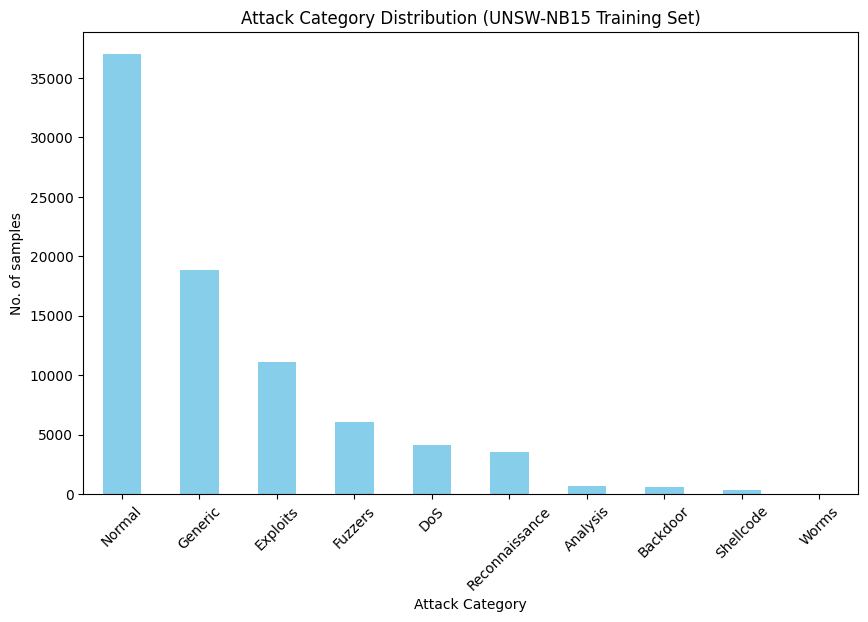

In [ ]:
import matplotlib.pyplot as plt

attack_counts = train['attack_cat'].value_counts()
print(attack_counts)

attack_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Attack Category')
plt.ylabel('No. of samples')
plt.title('Attack Category Distribution (UNSW-NB15 Training Set)')
plt.xticks(rotation=45)
plt.show()

###Check Feature Types
Which features are categorical vs numeric before encoding.

In [ ]:
train.dtypes

,0
id,int64
dur,float64
proto,object
service,object
state,object
spkts,int64
dpkts,int64
sbytes,int64
dbytes,int64
rate,float64


['proto', 'service', 'state', 'attack_cat'] are of object(means it contains categorical value) data-types and other are of numerical data-type(i.e., int64 & float64) but we should drop 'attack_cat' because it will lead to data leakage and model will learn completely on the basis of this column.

In [ ]:
# Drop unnecessary columns
train = train.drop(columns=['id', 'attack_cat'], errors='ignore')
test = test.drop(columns=['id', 'attack_cat'], errors='ignore')

train.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder

cat_cols = ['proto', 'service', 'state']
encoder = LabelEncoder()

for col in cat_cols:
  train[col] = encoder.fit_transform(train[col].astype(str))
  test[col] = encoder.fit_transform(test[col].astype(str))


# Split features and labels
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test.drop('label', axis=1)
y_test = test['label']


# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,21,0,4,2,0,496,0,90909.0902,254,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,21,0,4,2,0,1762,0,125000.0003,254,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,21,0,4,2,0,1068,0,200000.0051,254,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,21,0,4,2,0,900,0,166666.6608,254,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,21,0,4,2,0,2126,0,100000.0025,254,...,2,2,1,3,0,0,0,2,3,0


In [ ]:
# Save the preprocessed data for later use
import joblib

joblib.dump(X_train_scaled, 'X_train_scaled.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(X_test_scaled, 'X_test_scaled.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [ ]:
# To load the saved preprocessed data later
import joblib

X_train_scaled = joblib.load('/content/X_train_scaled.pkl')
y_train = joblib.load('/content/y_train.pkl')
X_test_scaled = joblib.load('/content/X_test_scaled.pkl')
y_test = joblib.load('/content/y_test.pkl')


In [ ]:
# --- 1️⃣ Check data shape consistency ---
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape:  {X_test_scaled.shape}")
print(f"y_train shape:        {y_train.shape}")
print(f"y_test shape:         {y_test.shape}")


X_train_scaled shape: (82332, 42)
X_test_scaled shape:  (175341, 42)
y_train shape:        (82332,)
y_test shape:         (175341,)


In [ ]:
# --- 2️⃣ Check for NaN or Inf values after scaling ---
print("\nNaN in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("NaN in X_test_scaled:", np.isnan(X_test_scaled).sum())


NaN in X_train_scaled: 0
NaN in X_test_scaled: 0


In [ ]:
print("\nInfinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())
print("Infinite values in X_test_scaled:", np.isinf(X_test_scaled).sum())


Infinite values in X_train_scaled: 0
Infinite values in X_test_scaled: 0


In [ ]:
# --- 3️⃣ Confirm feature scaling range (mean≈0, std≈1) ---
print("\nScaled Feature Means (first 10):", np.round(X_train_scaled.mean(axis=0)[:10], 3))
print("Scaled Feature STDs (first 10):", np.round(X_train_scaled.std(axis=0)[:10], 3))


Scaled Feature Means (first 10): [-0. -0.  0. -0. -0. -0. -0. -0.  0. -0.]
Scaled Feature STDs (first 10): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# --- 4️⃣ Check class distribution in y_train and y_test ---
print("\nLabel Distribution (Training):")
print(y_train.value_counts(normalize=True))

print("\nLabel Distribution (Testing):")
print(y_test.value_counts(normalize=True))


Label Distribution (Training):
label
1    0.5506
0    0.4494
Name: proportion, dtype: float64

Label Distribution (Testing):
label
1    0.680622
0    0.319378
Name: proportion, dtype: float64


In [ ]:
# --- 5️⃣ Optional: quick DataFrame preview for sanity ---
X_preview = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print("\nPreview of processed feature matrix:")
display(X_preview.head())


Preview of processed feature matrix:


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.213727,-0.061015,-0.799801,0.932695,-0.124455,-0.151816,-0.043684,-0.087369,0.057181,0.71944,...,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607
1,-0.213728,-0.061015,-0.799801,0.932695,-0.124455,-0.151816,-0.036308,-0.087369,0.286565,0.71944,...,-0.563660,-0.468312,-0.450186,-0.477994,-0.090857,-0.090617,-0.203143,-0.640033,-0.644190,-0.10607
2,-0.213729,-0.061015,-0.799801,0.932695,-0.124455,-0.151816,-0.040351,-0.087369,0.791209,0.71944,...,-0.563660,-0.468312,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.640033,-0.554273,-0.10607
3,-0.213729,-0.061015,-0.799801,0.932695,-0.124455,-0.151816,-0.041330,-0.087369,0.566923,0.71944,...,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607
4,-0.213728,-0.061015,-0.799801,0.932695,-0.124455,-0.151816,-0.034187,-0.087369,0.118350,0.71944,...,-0.444868,-0.349115,-0.450186,-0.390391,-0.090857,-0.090617,-0.203143,-0.522990,-0.554273,-0.10607


## Training baseline models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Support Vector Machine": SVC(probability=True, kernel='rbf', random_state=42)
}

results = {}
for name, model in models.items():
  print(f"\n Training {name}...")
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred_proba)

  print(classification_report(y_test, y_pred))

  results[name] = {
      "Accuracy": acc,
      "Precision": prec,
      "Recall": rec,
      "F1-Score": f1,
      "AUC": auc,
      "ConfusionMatrix": confusion_matrix(y_test, y_pred)
  }


 Training Logistic Regression...
              precision    recall  f1-score   support

           0       0.48      0.99      0.64     56000
           1       0.99      0.49      0.65    119341

    accuracy                           0.65    175341
   macro avg       0.73      0.74      0.65    175341
weighted avg       0.83      0.65      0.65    175341


 Training Random Forest...
              precision    recall  f1-score   support

           0       0.78      0.97      0.87     56000
           1       0.99      0.87      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.90    175341
weighted avg       0.92      0.90      0.91    175341


 Training XGBoost...
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     56000
           1       0.97      0.89      0.93    119341

    accuracy                           0.91    175341
   macro avg       0.89      0.92      0.90 

In [ ]:
'''Convert results into dataframe for easy comparision'''

results_df = pd.DataFrame(results).T
display(results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']])

,Accuracy,Precision,Recall,F1-Score,AUC
Logistic Regression,0.648907,0.993711,0.487242,0.653874,0.968949
Random Forest,0.903514,0.986436,0.870204,0.924682,0.98594
XGBoost,0.910603,0.972076,0.894345,0.931592,0.981289
Support Vector Machine,0.862799,0.98208,0.813258,0.889731,0.950675


Visualize Confusion Matrices

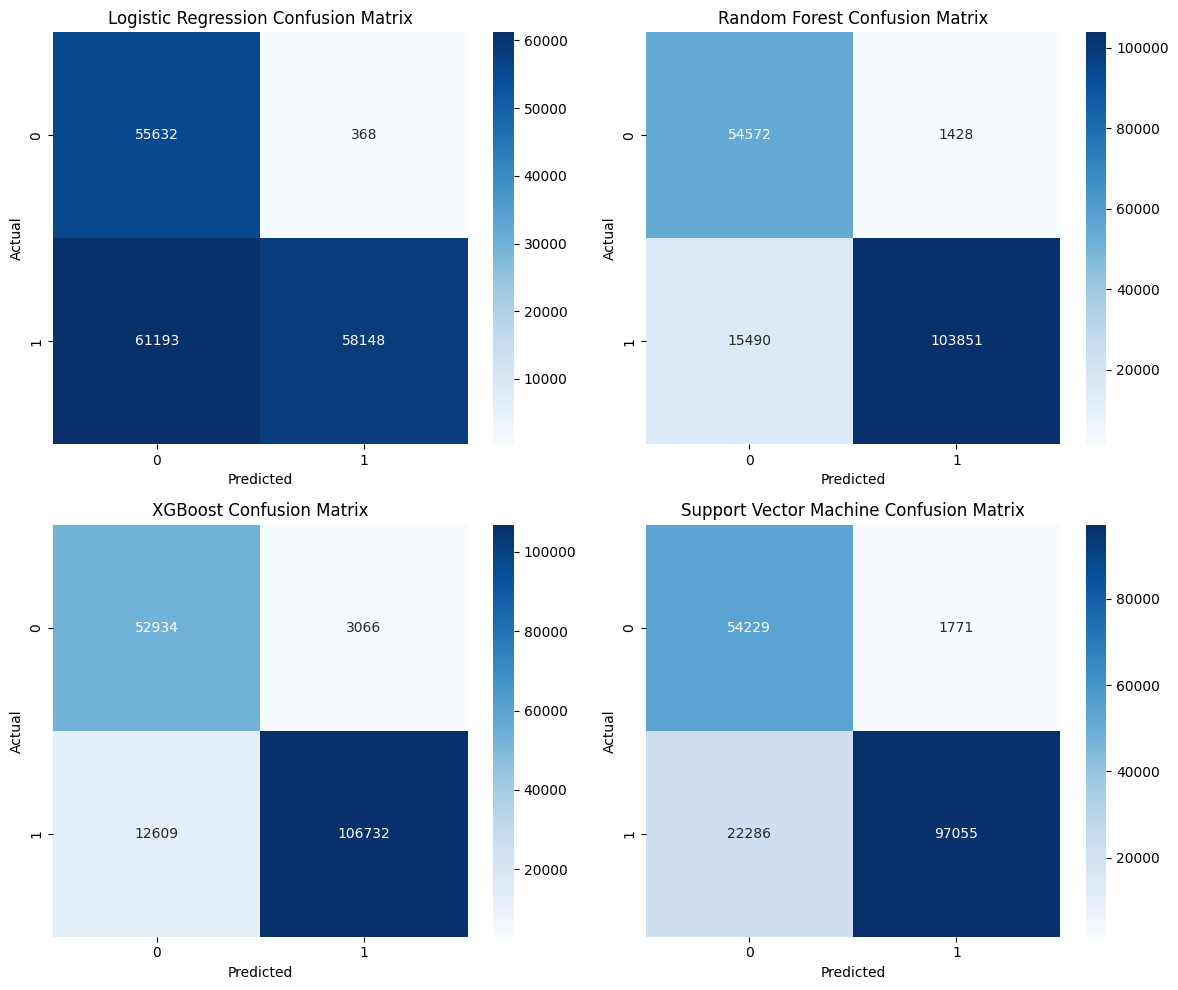

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res["ConfusionMatrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

ROC Curves

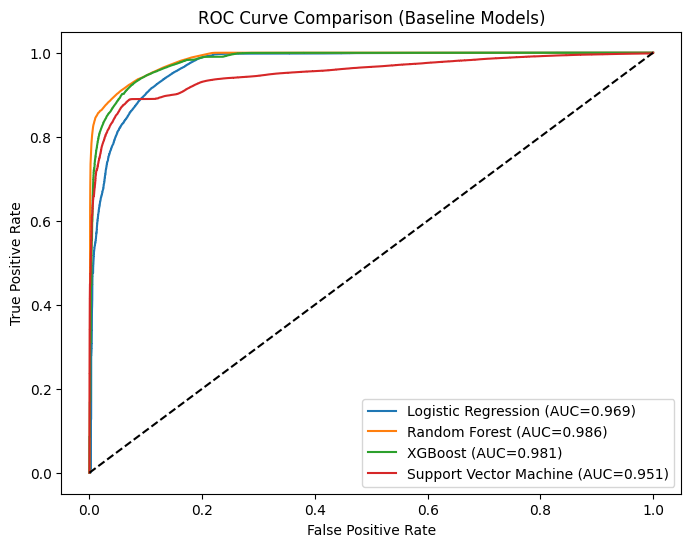

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_pred_prob):.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Baseline Models)")
plt.legend()
plt.show()


In [ ]:
# Save Trained Models
for name, model in models.items():
    joblib.dump(model, f"{name.replace(' ', '_').lower()}_baseline.pkl")

Load the best model for SHAP

In [ ]:
!pip install shap

In [ ]:
import joblib
import xgboost
import shap

best_model = joblib.load("xgboost_baseline.pkl")

booster = best_model.get_booster()



In [ ]:
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_preview)

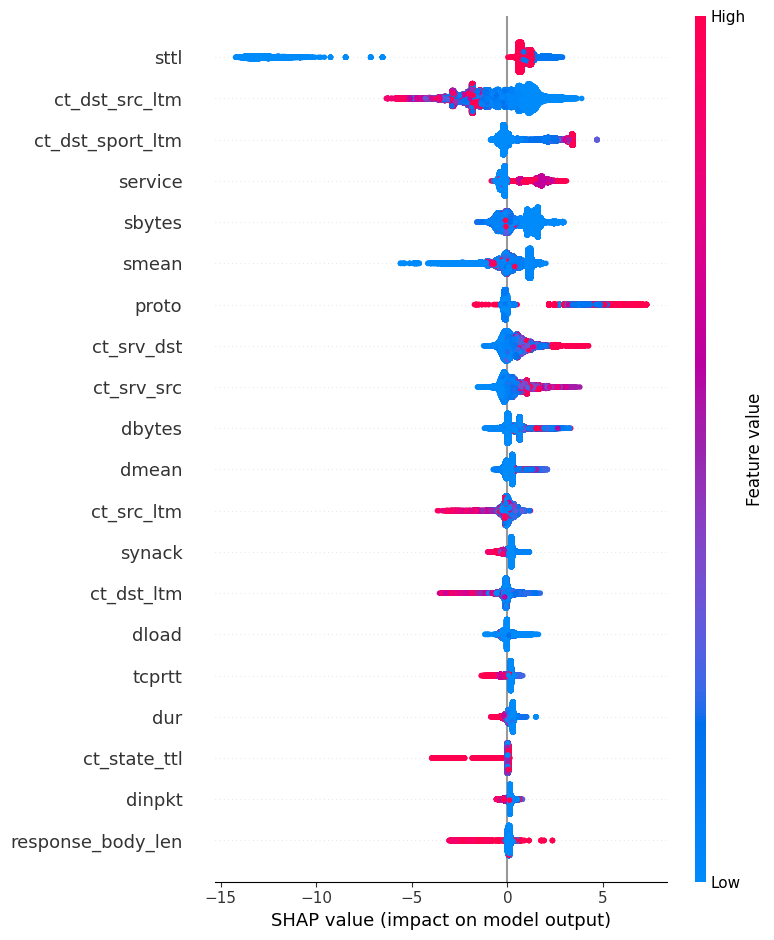

In [ ]:
shap.summary_plot(shap_values, X_preview, plot_type="dot")

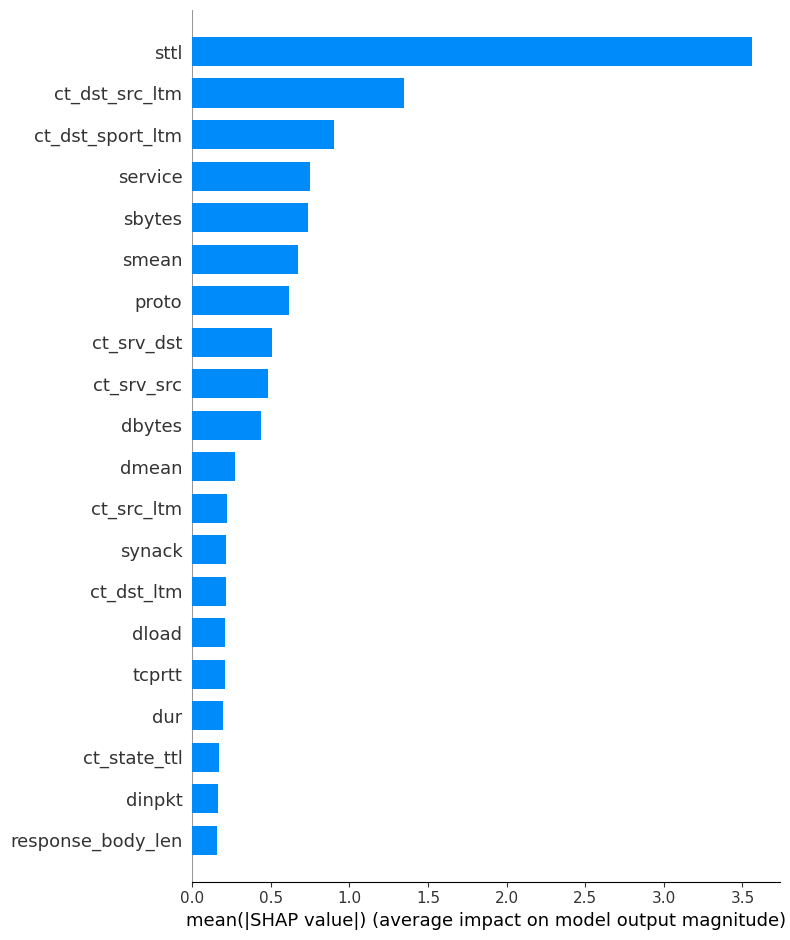

In [ ]:
shap.summary_plot(shap_values, X_preview, plot_type="bar")

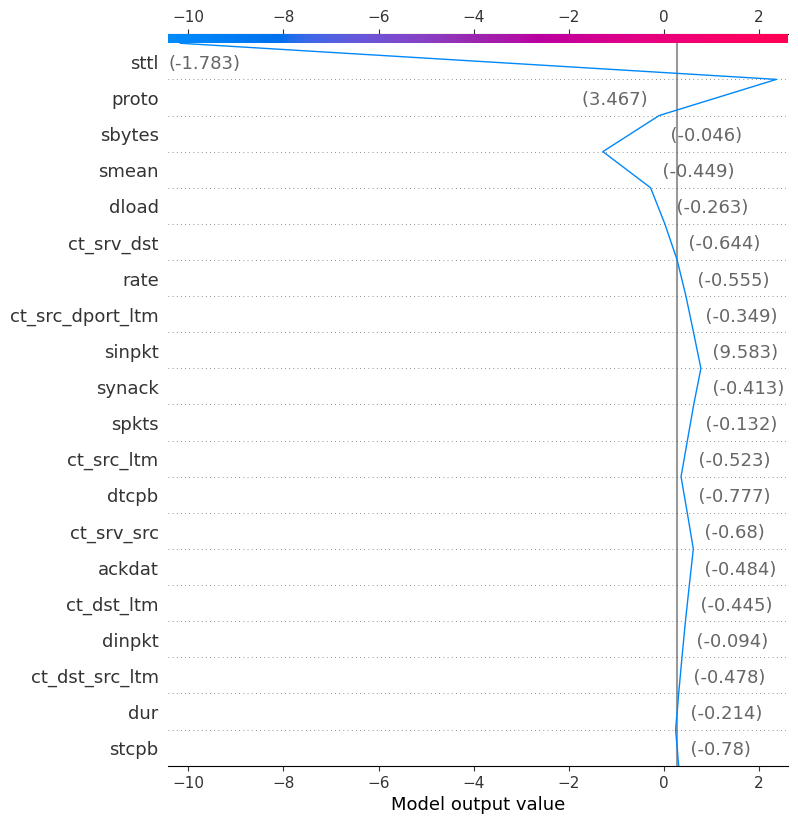

In [ ]:
index = 10
shap.decision_plot(
    explainer.expected_value,
    shap_values[index, :],
    X_preview.iloc[index],
)
